# IoT e Data Science na prática


Projeto realizado durante minhas aulas de Introdução a Computação do curso de Bacharelado em Ciência de Dados e tem com objetivo implementar uma conexão de serviço web `(API)` para coleta, leitura e aplicar algumas tecnicas de `Data Science` sobre os dados de aferição de temperatura e umidade capturados por sensores `IoT` situados no campus da universidade.


##### Copyright (c) 2021, Carlos Mandele K.

<p xmlns:cc="http://creativecommons.org/ns#" >Este projeto está licenciado sob <a href="http://creativecommons.org/licenses/by-nc/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;" >Attribution-NonCommercial 4.0 International

*Nota*: Por questões de segurança algumas informações foram ocultadas

In [ ]:
# Instalando o Arrow,
!pip install arrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.0 MB/s eta 0:00:00


## Importação das libs

In [ ]:
# Importação das bibliotecas
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session
import numpy as np
import pandas as pd
import arrow
from pandas import json_normalize
import json
import glob
import matplotlib.pyplot as plt

## Definindo as funções para conexão com a API da plataforma

In [ ]:
# Definindo as funções para uso da API da plataforma
def get_data(application,guid,timestamp_init,timestamp_final):
    result = []
    i = 0
    lastlen=10000
    while timestamp_init < timestamp_final:
        stats = oauth.get("https://demo.konkerlabs.net/v1/{}/incomingEvents?q=device:{} timestamp:>{}&sort=oldest&limit=10000".format(application,guid, timestamp_init)).json()['result']
        if (len(stats)<2) and (lastlen<10000) :
            break
        timestamp_init = stats[-1]['timestamp']
        result.extend(stats)
        lastlen = len(stats)
        print(timestamp_init)
    return result

def list_devices(oauth):
    global base_api
    devices = oauth.get("https://demo.konkerlabs.net/v1/{}/devices/?size=5000".format(application)).json()['result']
    return devices

print("Funções para uso da API da plataforma definidas")

Funções para uso da API da plataforma definidas


## Inserção dos dados da conta para autenticação na plataforma

In [ ]:
# Autenticação na plataforma
base_api = 'https://demo.konkerlabs.net'
application = ""
username = ""
password = ""

In [ ]:
# Autenticando e pegando o token de acesso a conta
client = BackendApplicationClient(client_id=username)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url='{}/v1/oauth/token'.format(base_api),client_id=username,client_secret=password)

print("Autenticação realizada com sucesso")

Autenticação realizada com sucesso


## Listando os dispositivos `(sensores)` dessa conta

In [ ]:
# Listando os dispositivos da conta.
# Cada dispositivo possuí um sensor, localizado em um dos polos da universidade.
# Existem dispositivos que não possuem dados, pois nunca foram ligados, bem como alguns com dados intermitentes.
dev_list = list_devices(oauth)

In [ ]:
# Visualizando os metadados de dispositivos alvo.
dev_list

[{'id': 'S8V0200D5F32D',
  'name': 'S8V0200D5F32D-DHT22',
  'description': 'DHT22',
  'locationName': 'default',
  'deviceModelName': 'S8V02',
  'active': True,
  'debug': False,
  'tags': [],
  'guid': 'faa758a5-7772-4063-9fa1-87373bee6cd2'},
 {'id': 'S8V0200D5E70E',
  'name': 'S8V0200D5E70E-DHT22',
  'description': 'DHT22',
  'locationName': 'default',
  'deviceModelName': 'S8V02',
  'active': True,
  'debug': False,
  'tags': [],
  'guid': '5fb50477-efb0-4689-be66-4465c4df954d'},
 {'id': 'S8V0200D2445B',
  'name': 'S8V0200D2445B-DHT22',
  'description': 'DHT22',
  'locationName': 'default',
  'deviceModelName': 'S8V02',
  'active': True,
  'debug': False,
  'tags': [],
  'guid': '76bb89c6-9e62-4a6d-a18f-d3efdcf66ec1'},
 {'id': 'S8V0200D33437',
  'name': 'S8V0200D33437-DHT22',
  'description': 'DHT22',
  'locationName': 'default',
  'deviceModelName': 'S8V02',
  'active': True,
  'debug': False,
  'tags': [],
  'guid': '583f0027-a2f5-4cb1-ae13-01a5d2bb324d'},
 {'id': 'S8V0200DDB14D',

Todos os dispositivos `(sensores)` são identificados na plataforma pelo seu guid. O guid neste caso é usado para extrair ou descarregar os dados de um único dispositivo. Por tanto, vamos inspecionar o dispositivo `(id do dispositivo)` que está em São Paulo (longitude & latitude).

In [ ]:
guid = "xxxx-xxxxx-xx-xxxxx-yxyxyx"

## Data Science em ação

* Inspensionando os dados dos dispositivos(`sensores`) no mês de junho e julho

In [ ]:
# Inspensionando os dados dos dispositivos no mês de junho e julho
data_inicial = '2020-06-01T00:00:00.000000'
data_final = '2020-08-01T00:00:00.000000'
dev_data = get_data(application, guid, data_inicial , data_final)
stats_df = json_normalize(dev_data).set_index('timestamp')
stats_df.index = pd.to_datetime(stats_df.index)
stats_df.index = stats_df.index.tz_convert('America/Sao_Paulo')

2020-06-06T18:02:45.104Z
2020-06-12T11:02:49.573Z
2020-06-19T09:46:43.374Z
2020-07-16T21:40:49.774Z
2020-08-09T11:32:24.295Z


In [ ]:
stats_df.head()

,ingestedTimestamp,incoming.deviceGuid,incoming.channel,payload.temperature,payload.humidity,payload.info.mac,payload.info.net,payload.info.ip,payload.info.rssi,payload.errors.connection,payload.errors.pub,payload
timestamp,,,,,,,,,,,,
2020-05-31 21:00:29.130000-03:00,2020-06-01T00:00:29.130Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.1,44.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31 21:01:31.232000-03:00,2020-06-01T00:01:31.232Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.0,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31 21:02:29.123000-03:00,2020-06-01T00:02:29.123Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.0,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31 21:02:40.755000-03:00,2020-06-01T00:02:40.755Z,60e55023-91a9-4e85-b49c-e732b5e69318,_health,NaN,NaN,18:FE:34:A0:B4:B7,UNIVESP,172.16.0.69,-67.0,1.0,18991.0,NaN
2020-05-31 21:03:29.123000-03:00,2020-06-01T00:03:29.123Z,60e55023-91a9-4e85-b49c-e732b5e69318,data,22.0,44.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Vamos agora inspensionar os dados do dispositivo:
stats_df.groupby(['incoming.channel']).count()


,ingestedTimestamp,incoming.deviceGuid,payload.temperature,payload.humidity,payload.info.mac,payload.info.net,payload.info.ip,payload.info.rssi,payload.errors.connection,payload.errors.pub,payload
incoming.channel,,,,,,,,,,,
_health,19384,19384,0,0,19384,19384,19384,19384,19384,19384,0
_networks,1615,1615,0,0,0,0,0,0,0,0,1615
data,29001,29001,29001,29001,0,0,0,0,0,0,0


### Algumas metricas de estatistica básicas

In [ ]:
stats_df.describe()

,payload.temperature,payload.humidity,payload.info.rssi,payload.errors.connection,payload.errors.pub
count,29001.000000,29001.000000,19384.000000,19384.000000,19384.000000
mean,24.573697,54.827358,-67.246440,2.023525,5377.609472
std,1.319867,5.145520,3.465142,2.222161,8792.952741
min,18.800000,36.300000,-96.000000,0.000000,0.000000
25%,23.700000,51.600000,-69.000000,0.000000,5.000000
50%,24.600000,55.900000,-67.000000,1.000000,45.000000
75%,25.500000,59.000000,-65.000000,5.000000,18992.000000
max,27.700000,63.200000,-63.000000,5.000000,21546.000000


### Os dispositivos apresentam 3 canais de dados independentes:
* _health: envia os dados com relação a rede a qual o dispositivo está conectado, sobre os erros de leitura e envio dos dados;
*  _networks: envia os dados com relação as redes wifi visíveis para o dispositivo (`usado para reconstrução da posição`);
* data: envia os dados de temperatura e umidade medidos pelo DHT22.

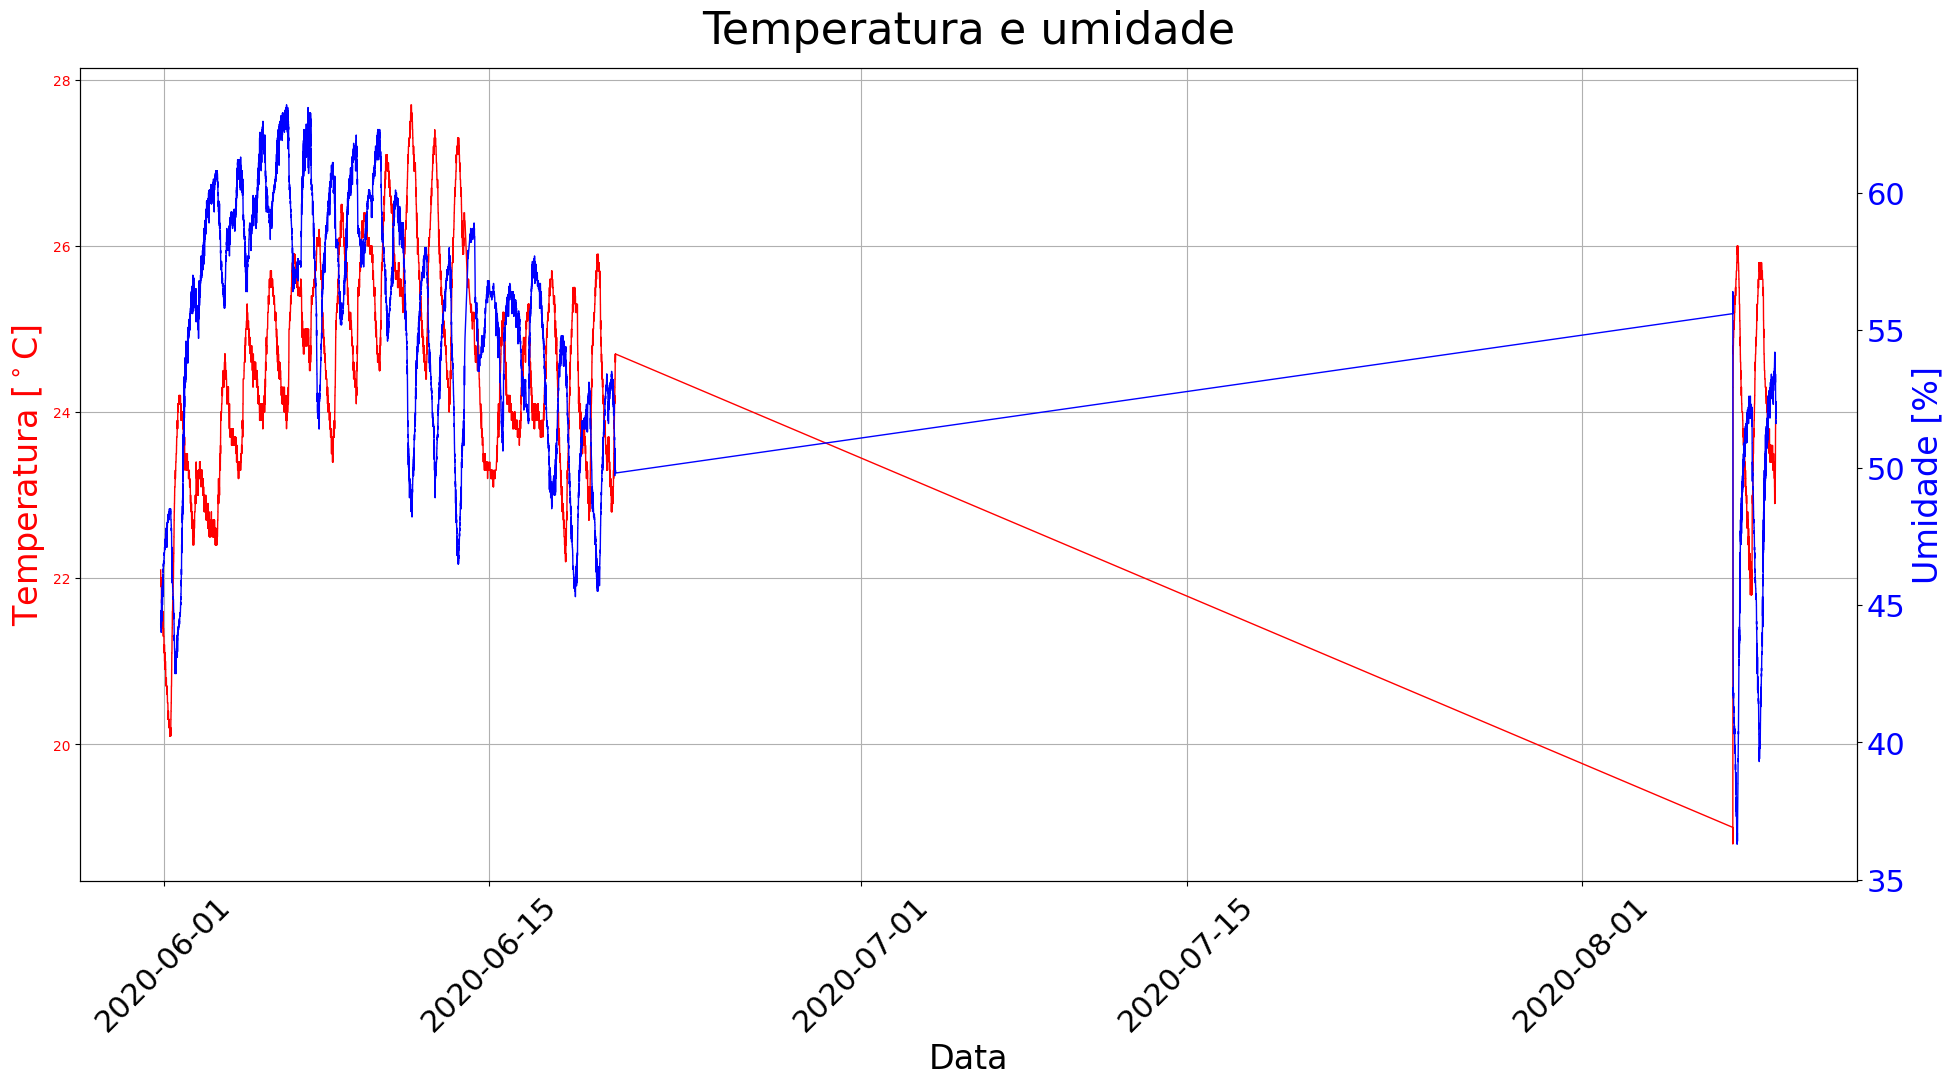

In [ ]:
#Visualização dos dados de temperatura e umidade capturados pelos sensores
fig, ax1 = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.gca().xaxis_date('America/Sao_Paulo')
plt.rcParams['timezone'] = 'America/Sao_Paulo'
plt.title('Temperatura e umidade', size=32,y=1.02)
ax1.plot(stats_df[stats_df['incoming.channel']=='data']['payload.temperature'], color='red',alpha=1, linewidth=1)
ax1.set_ylabel('Temperatura [$^\circ$C]', size=24, color = 'red')
ax1.set_xlabel('Data', size=24)
plt.grid()
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    fig.tight_layout()
labels = ax1.get_xticklabels()
ax2 = ax1.twinx()
ax2.plot(stats_df[stats_df['incoming.channel']=='data']['payload.humidity'], color='blue', linewidth=1)
ax2.set_ylabel('Umidade [%]', size=24, color = 'blue')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
fig.tight_layout()
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=22)
plt.show()


No gráfico acima é possível observar um gap nos dados de mais de 30 dias. Por exemplo o sensor DHT22 tem um índice de falha relativamente alto, os dados deste dispositivo não estão disponíveis em todo o intervalo. Esses dados são gerados por processos distintos rodando no ESP8266, logo podem falhar de forma independente. Por tanto, vamos olhar apenas os dados das primeiras semanas do gráfico.

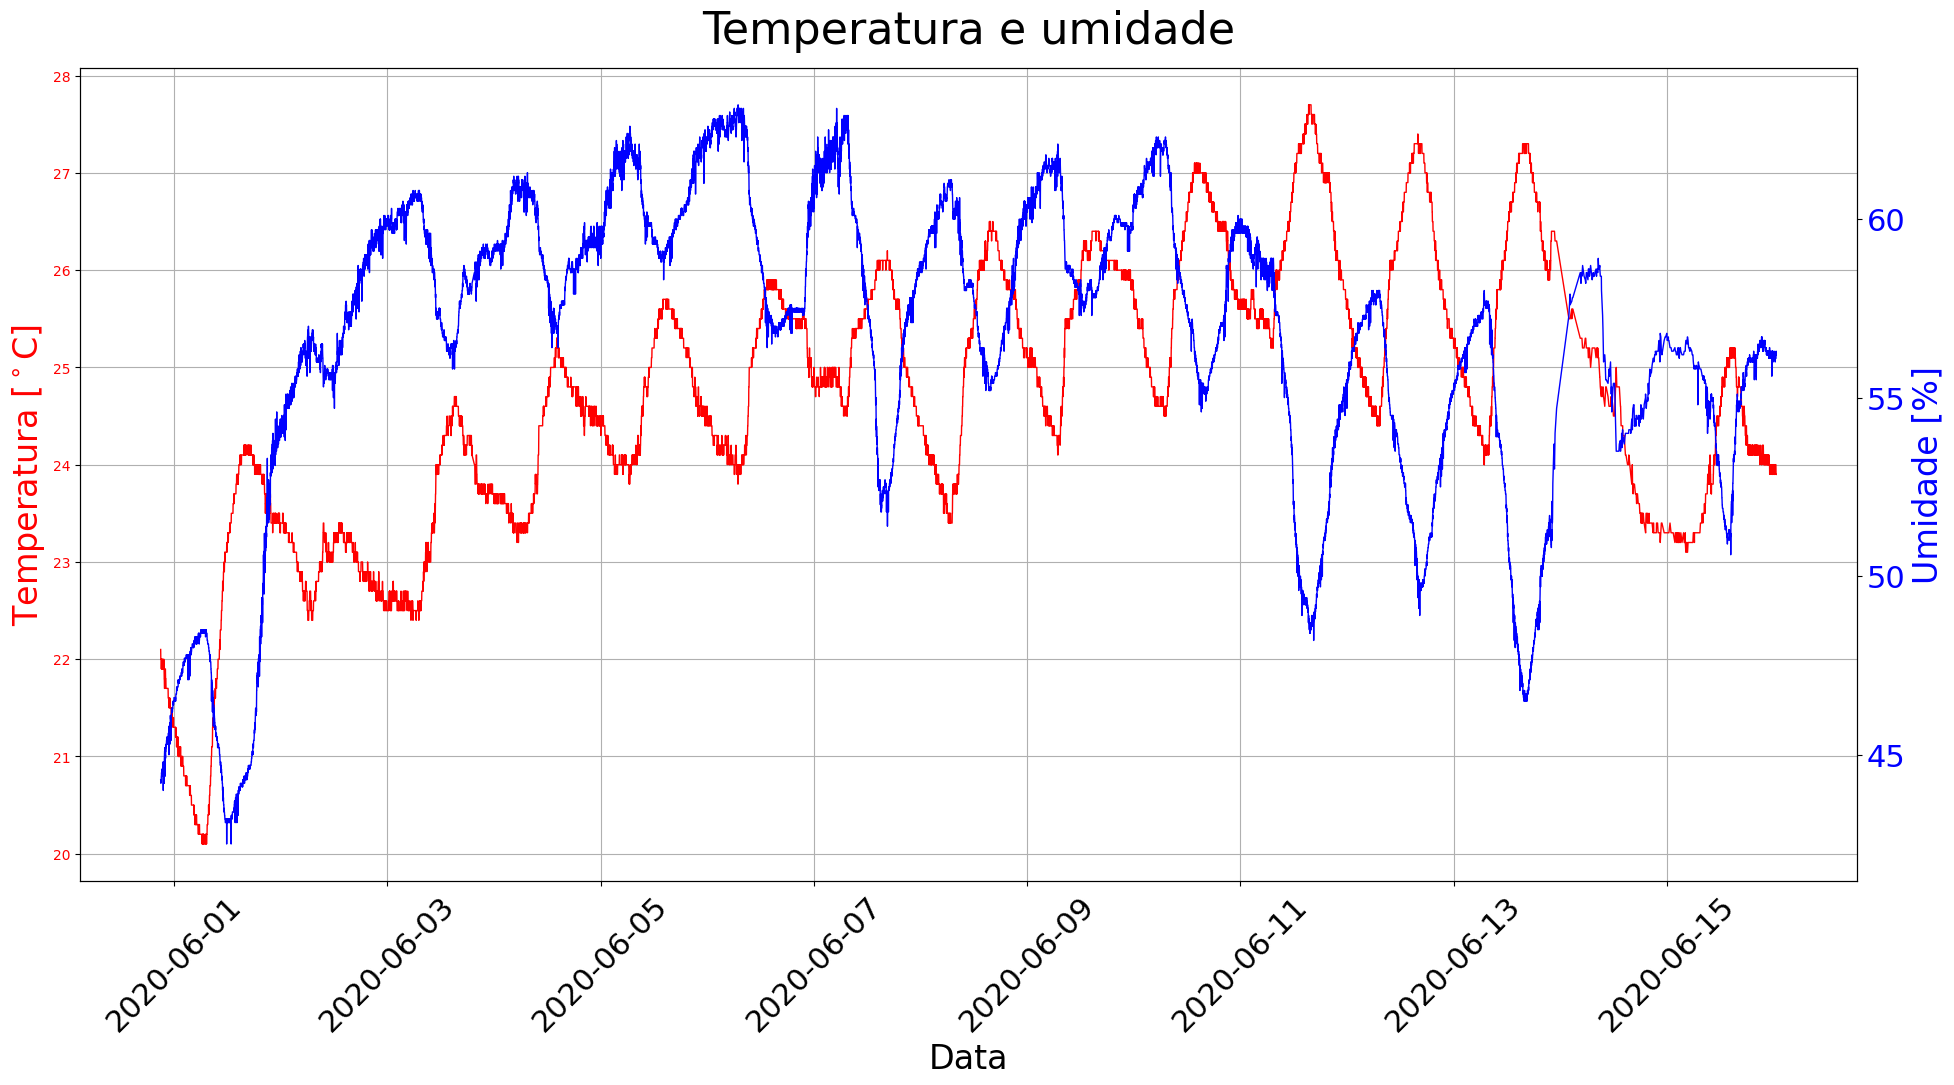

In [ ]:

# Vamos olhar apenas as primeiras semanas do gráfico:
# Visualização dos dados de temperatura e umidade capturados pelos sensores
fig, ax1 = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.gca().xaxis_date('America/Sao_Paulo')
plt.rcParams['timezone'] = 'America/Sao_Paulo'
plt.title('Temperatura e umidade', size=32,y=1.02)
ax1.plot(stats_df[stats_df['incoming.channel']=='data']['payload.temperature'][:20000], color='red',alpha=1, linewidth=1)
ax1.set_ylabel('Temperatura [$^\circ$C]', size=24, color = 'red')
ax1.set_xlabel('Data', size=24)
plt.grid()
for tl in ax1.get_yticklabels():
    tl.set_color('r')
    fig.tight_layout()
labels = ax1.get_xticklabels()
ax2 = ax1.twinx()
ax2.plot(stats_df[stats_df['incoming.channel']=='data']['payload.humidity'][:20000], color='blue', linewidth=1)
ax2.set_ylabel('Umidade [%]', size=24, color = 'blue')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
fig.tight_layout()
labels = ax1.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=22)
plt.show()


In [ ]:
print("Primeira etapa do projeto finalizada!")

Primeira etapa do projeto finalizada!
